# 二十四.图像特效处理之毛玻璃、浮雕和油漆特效

1.图像毛玻璃特效

2.图像浮雕特效

3.图像油漆特效

4.本文小结


## 24.1.图像毛玻璃特效

图像毛玻璃特效如图所示，左边为原始图像，右边为毛玻璃特效图像。它是用图像邻域内随机一个像素点的颜色来替代当前像素点颜色的过程，从而为图像增加一个毛玻璃模糊的特效。


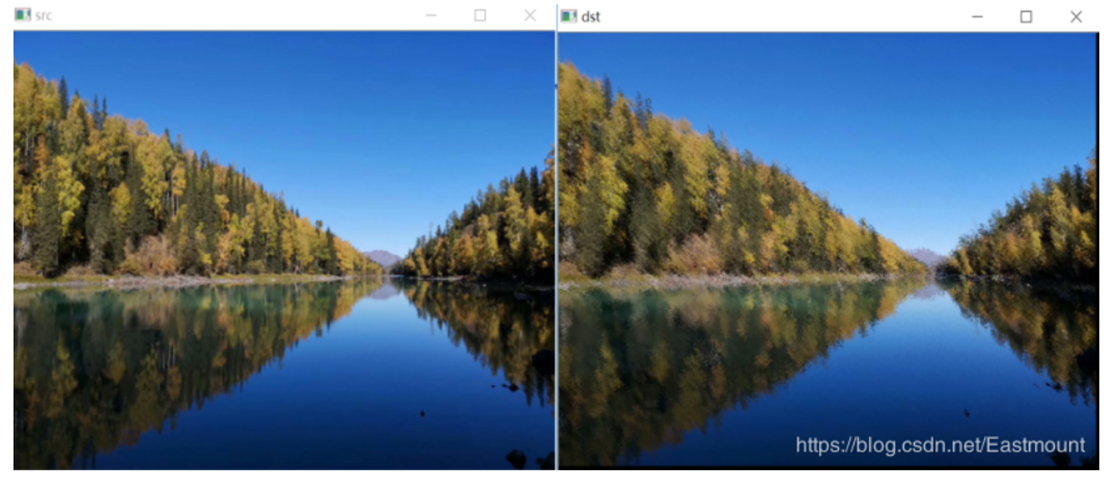

Python实现代码主要是通过双层循环遍历图像的各像素点，再用定义的随机数去替换各邻域像素点的颜色，具体代码如下所示。



In [1]:
#coding:utf-8
import cv2
import numpy as np

#读取原始图像
src = cv2.imread('test.jpg')

#新建目标图像
dst = np.zeros_like(src)

#获取图像行和列
rows, cols = src.shape[:2]

#定义偏移量和随机数
offsets = 5
random_num = 0

#毛玻璃效果: 像素点邻域内随机像素点的颜色替代当前像素点的颜色
for y in range(rows - offsets):
    for x in range(cols - offsets):
        random_num = np.random.randint(0,offsets)
        dst[y,x] = src[y + random_num,x + random_num]

#显示图像
cv2.imshow('src',src)
cv2.imshow('dst',dst)

cv2.waitKey()
cv2.destroyAllWindows()



## 24.2.图像浮雕特效

图像浮雕特效是仿造浮雕艺术而衍生的处理，它将要呈现的图像突起于石头表面，根据凹凸程度不同形成三维的立体效果。Python绘制浮雕图像是通过勾画图像的轮廓，并降低周围的像素值，从而产生一张具有立体感的浮雕效果图。传统的方法是设置卷积核，再调用OpenCV的filter2D()函数实现浮雕特效。该函数主要是利用内核实现对图像的卷积运算，其函数原型如下所示：

dst = filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]])

src表示输入图像dst表示输出的边缘图，其大小和通道数与输入图像相同ddepth表示目标图像所需的深度kernel表示卷积核，一个单通道浮点型矩阵anchor表示内核的基准点，其默认值为（-1，-1），位于中心位置delta表示在储存目标图像前可选的添加到像素的值，默认值为0borderType表示边框模式核心代码如下：


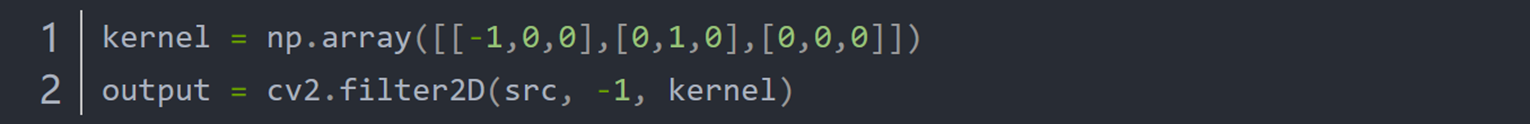

本小节将直接对各像素点进行处理，采用相邻像素相减的方法来得到图像轮廓与平面的差，类似边缘的特征，从而获得这种立体感的效果。为了增强图片的主观感受，还可以给这个差加上一个固定值，如150。实现效果如图所示。


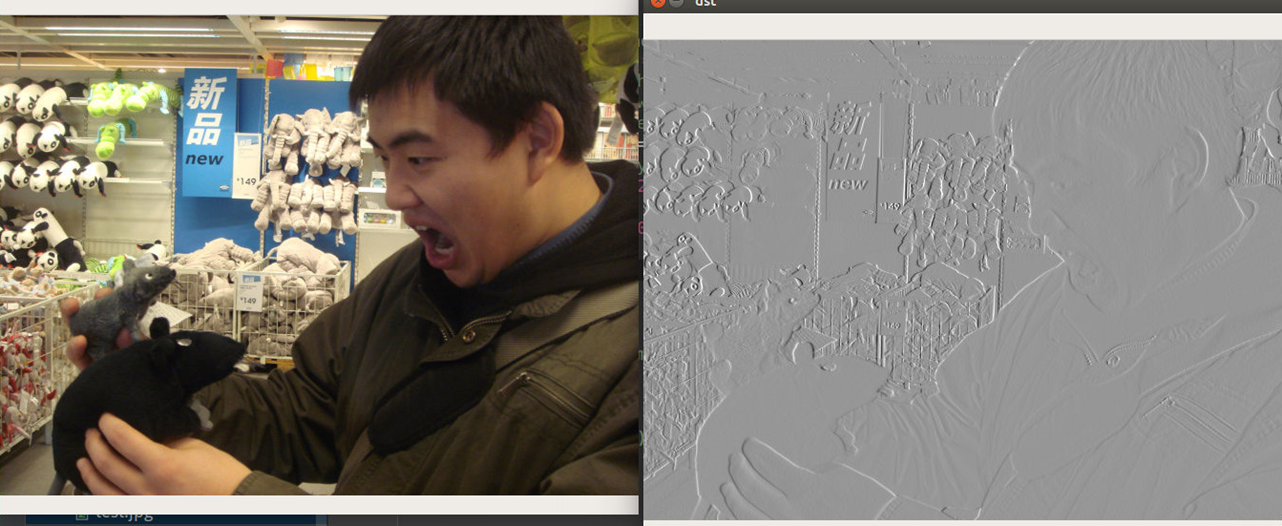

Python通过双层循环遍历图像的各像素点，使用相邻像素值之差来表示当前像素值，从而得到图像的边缘特征，最后加上固定数值150得到浮雕效果，具体代码如下所示。


In [4]:
# -*- coding: utf-8 -*-
import cv2
import numpy as np

#读取原始图像
img = cv2.imread('test.jpg', 1)

#获取图像的高度和宽度
height, width = img.shape[:2]

#图像灰度处理
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#创建目标图像
dstImg = np.zeros((height,width,1),np.uint8)

#浮雕特效算法：newPixel = grayCurrentPixel - grayNextPixel + 150
for i in range(0,height):
    for j in range(0,width-1):
        grayCurrentPixel = int(gray[i,j])
        grayNextPixel = int(gray[i,j+1])
        newPixel = grayCurrentPixel - grayNextPixel + 150
        if newPixel > 255:
            newPixel = 255
        if newPixel < 0:
            newPixel = 0
        dstImg[i,j] = newPixel
        
#显示图像
cv2.imshow('src', img)
cv2.imshow('dst',dstImg)

#等待显示
cv2.waitKey()
cv2.destroyAllWindows()



## 24.3.图像油漆特效

图像油漆特效类似于油漆染色后的轮廓图形，它主要采用自定义卷积核和cv2.filter2D()函数实现，Python实现代码主要通过Numpy定义卷积核，再进行特效处理，卷积核如公式（13-1）所示，其中心权重为10，其余值均为-1。


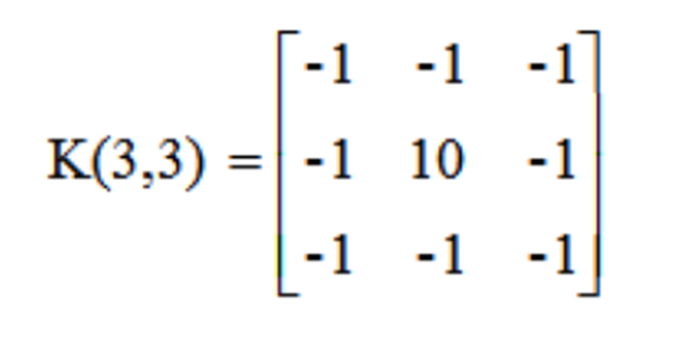

完整代码如下所示：


In [9]:
# -*- coding: utf-8 -*-
import cv2
import numpy as np

#读取原始图像
src = cv2.imread('fengjing.jpg')

#图像灰度处理
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)

#自定义卷积核
kernel = np.array([[-1,-1,-1],[-1,10,-1],[-1,-1,-1]])

#图像浮雕效果
output = cv2.filter2D(gray, -1, kernel)

#显示图像
cv2.imshow('Original Image', src)
cv2.imshow('Emboss_1',output)

#等待显示
cv2.waitKey()
cv2.destroyAllWindows()

